# Laboratorio 2

Modelación y Simulación

Edwin Ortega 22305 - Esteban Zambrano 22119 - Juan Pablo Solis 22102

Ejercicios en donde se necesita usar Python

### **Ejercicio 4**

In [3]:
import numpy as np

def biseccion(f, a, b, tol=1e-7, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    aprox = []
    for _ in range(max_iter):
        c = (a + b) / 2
        aprox.append(c)

        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return aprox, c

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return aprox, (a + b) / 2

In [4]:
def secante(f, x0, x1, tol=1e-7, max_iter=100):
    aprox = [x0, x1]
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            raise ZeroDivisionError("División por cero en el método de la secante.")
        
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        aprox.append(x2)
        if abs(x2 - x1) < tol:
            return aprox, x2
        x0, x1 = x1, x2
    return aprox, x2

In [5]:
def newton_raphson(f, df, x0, tol=1e-7, max_iter=100):
    aprox = [x0]
    for _ in range(max_iter):
        f_x = f(x0)
        df_x = df(x0)
        if df_x == 0:
            raise ZeroDivisionError("La derivada es cero; no se puede continuar.")

        x1 = x0 - f_x / df_x
        aprox.append(x1)
        if abs(x1 - x0) < tol:
            return aprox, x1
        x0 = x1
    return aprox, x0

In [4]:
# Función y derivada
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Bisección
aprox_bis, raiz_bis = biseccion(f, 1, 2)
print("Bisección:", raiz_bis)

# Secante
aprox_sec, raiz_sec = secante(f, 1, 2)
print("Secante:", raiz_sec)

# Newton-Raphson
aprox_newt, raiz_newt = newton_raphson(f, df, 1)
print("Newton-Raphson:", raiz_newt)

Bisección: 1.4142135381698608
Secante: 1.4142135623730954
Newton-Raphson: 1.4142135623730951


### **Ejercicio 5**

In [6]:
import numpy as np

# Definir la función y su derivada
def g(x):
    return x**2 + 1/(x - 7)

def dg(x):
    return 2*x - 1/(x - 7)**2

In [13]:
# Validamos el cambio de signo
print("g(-0.4) =", g(-0.4))  # negativo
print("g(-0.3) =", g(-0.3))  # positivo


g(-0.4) = 0.024864864864864916
g(-0.3) = -0.04698630136986301


In [14]:
# Método de Bisección
aprox_bis, raiz_bis = biseccion(g, -0.4, -0.3)
print("Raíz (bisección):", raiz_bis, "| Iteraciones:", len(aprox_bis))

# Método de la Secante (puede usar los mismos puntos)
aprox_sec, raiz_sec = secante(g, -0.4, -0.3)
print("Raíz (secante):", raiz_sec, "| Iteraciones:", len(aprox_sec))

# Método de Newton-Raphson
aprox_newt, raiz_newt = newton_raphson(g, dg, -0.35)
print("Raíz (Newton-Raphson):", raiz_newt, "| Iteraciones:", len(aprox_newt))

Raíz (bisección): -0.3683948516845704 | Iteraciones: 18
Raíz (secante): -0.36839485373297565 | Iteraciones: 7
Raíz (Newton-Raphson): -0.3683948537329749 | Iteraciones: 5


### **Ejercicio 6**

In [2]:
import numpy as np

# Coeficientes del polinomio en orden descendente
coef = [2, 3, -3, -10, -4, 4]

raices = np.roots(coef)

print("Ceros del polinomio:")
for r in raices:
    if np.isreal(r):
        print(f"Raíz real: {r.real:.4f}")
    else:
        print(f"Raíz compleja: {r.real:.4f} + {r.imag:.4f}j")



Ceros del polinomio:
Raíz real: 1.5937
Raíz compleja: -1.1223 + 0.9262j
Raíz compleja: -1.1223 + -0.9262j
Raíz real: -1.3037
Raíz real: 0.4546


### **Ejercicio 7**

##### Inciso A

In [15]:
# Función f(x) = x^3 - 2x + 2
def f7(x):
    return x**3 - 2*x + 2

# Derivada f'(x) = 3x^2 - 2
def df7(x):
    return 3*x**2 - 2


In [16]:
# Newton-Raphson con punto inicial x0 = 0
aprox_7a, raiz_7a = newton_raphson(f7, df7, 0)
print("Raíz encontrada:", raiz_7a)
print("Iteraciones:", len(aprox_7a))


Raíz encontrada: 0.0
Iteraciones: 101


In [17]:
print("Aproximaciones:")
for i, x in enumerate(aprox_7a):
    print(f"Iteración {i}: x = {x}")

Aproximaciones:
Iteración 0: x = 0
Iteración 1: x = 1.0
Iteración 2: x = 0.0
Iteración 3: x = 1.0
Iteración 4: x = 0.0
Iteración 5: x = 1.0
Iteración 6: x = 0.0
Iteración 7: x = 1.0
Iteración 8: x = 0.0
Iteración 9: x = 1.0
Iteración 10: x = 0.0
Iteración 11: x = 1.0
Iteración 12: x = 0.0
Iteración 13: x = 1.0
Iteración 14: x = 0.0
Iteración 15: x = 1.0
Iteración 16: x = 0.0
Iteración 17: x = 1.0
Iteración 18: x = 0.0
Iteración 19: x = 1.0
Iteración 20: x = 0.0
Iteración 21: x = 1.0
Iteración 22: x = 0.0
Iteración 23: x = 1.0
Iteración 24: x = 0.0
Iteración 25: x = 1.0
Iteración 26: x = 0.0
Iteración 27: x = 1.0
Iteración 28: x = 0.0
Iteración 29: x = 1.0
Iteración 30: x = 0.0
Iteración 31: x = 1.0
Iteración 32: x = 0.0
Iteración 33: x = 1.0
Iteración 34: x = 0.0
Iteración 35: x = 1.0
Iteración 36: x = 0.0
Iteración 37: x = 1.0
Iteración 38: x = 0.0
Iteración 39: x = 1.0
Iteración 40: x = 0.0
Iteración 41: x = 1.0
Iteración 42: x = 0.0
Iteración 43: x = 1.0
Iteración 44: x = 0.0
Iterac

##### Inciso B

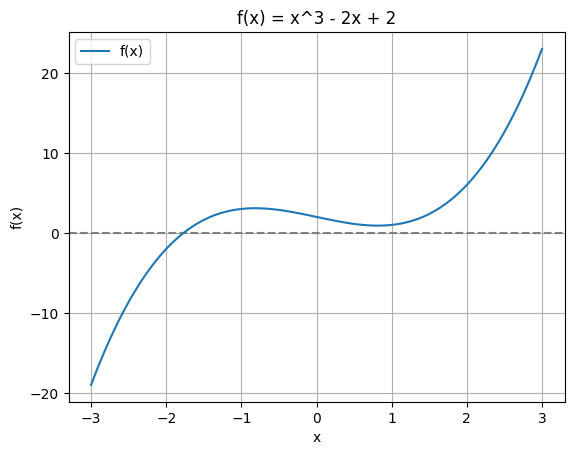

In [19]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-3, 3, 500)
y_vals = [f7(x) for x in x_vals]

plt.axhline(0, color='gray', linestyle='--')
plt.plot(x_vals, y_vals, label='f(x)')
plt.title("f(x) = x^3 - 2x + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


In [20]:
aprox_7b, raiz_7b = newton_raphson(f7, df7, -2)
print("Raíz encontrada:", raiz_7b)
print("Iteraciones:", len(aprox_7b))

Raíz encontrada: -1.7692923542386314
Iteraciones: 6


### **Ejercicio 8**

In [4]:
import numpy as np

def F(vec):
    x, y, z = vec
    return np.array([
        3*x - np.cos(y*z) - 0.5,
        x**2 - 81*(y + 0.1)**2 + np.sin(z) + 1.06,
        np.exp(-x*y) + 20*z + (10*np.pi - 3)/3
    ])

def DF(vec):
    x, y, z = vec
    return np.array([
        [3,          np.sin(y*z)*z,         np.sin(y*z)*y],
        [2*x,        -162*(y + 0.1),        np.cos(z)],
        [-y*np.exp(-x*y), -x*np.exp(-x*y), 20]
    ])

def newton_multidimensional(f, df, x0, max_iter=50, tol=1e-7):
    x = x0
    approximations = [x0.copy()]
    
    for i in range(max_iter):
        J = df(x)
        Fx = f(x)
        try:
            delta = np.linalg.solve(J, -Fx)
        except np.linalg.LinAlgError:
            print("Jacobian is singular")
            return approximations, x
        
        x = x + delta
        approximations.append(x.copy())
        
        if np.linalg.norm(delta, ord=2) < tol:
            break

    return approximations, x


x0 = np.array([0.1, 0.1, -0.1])  
aproxs, sol = newton_multidimensional(F, DF, x0)

print("=== Solución aproximada con 7 cifras decimales ===")
print(f"x = {sol[0]:.7f}")
print(f"y = {sol[1]:.7f}")
print(f"z = {sol[2]:.7f}\n")


=== Solución aproximada con 7 cifras decimales ===
x = 0.5000000
y = 0.0000000
z = -0.5235988

